In [372]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns # For Visualization 


import warnings
warnings.filterwarnings('ignore')


In [373]:
df= pd.read_excel("flight_dataset.xlsx")
dfToProcess=df
x=df.iloc[:,:-1].values
y=df.iloc[:,5].values
df

,Flight Date,Airline,From,To,Flight Duration (min),Price
0,20.12.2023,Anadolujet,ADA,ESB,65,"936,99"
1,20.12.2023,Anadolujet,ADA,ESB,65,"936,99"
2,20.12.2023,Sunexpress,ADA,AYT,75,"1264,99"
3,20.12.2023,Sunexpress,ADA,AYT,75,"1464,99"
4,20.12.2023,Pegasus,ADA,AYT,65,"1579,99"
...,...,...,...,...,...,...
994,25.12.2023,Pegasus,SAW,VAN,130,"1484,99"
995,25.12.2023,Anadolujet,SAW,VAN,125,"1509,99"
996,25.12.2023,Sunexpress,ADB,KSY,130,"1614,99"
997,25.12.2023,Sunexpress,ADB,ASR,90,"1364,99"


In [374]:
print("\nOverview of the dataset:")
df.describe(include='all').T



Overview of the dataset:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Flight Date,999,6,21.12.2023,183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Airline,999,4,Anadolujet,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN
From,999,14,SAW,240,NaN,NaN,NaN,NaN,NaN,NaN,NaN
To,999,25,SAW,160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Flight Duration (min),999.0,NaN,NaN,NaN,93.813814,19.537984,60.0,80.0,90.0,110.0,135.0
Price,999,158,"1149,99",67,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Preprocessing

In [375]:
#We're checking if there is null value in columns
df.isnull()

,Flight Date,Airline,From,To,Flight Duration (min),Price
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
994,False,False,False,False,False,False
995,False,False,False,False,False,False
996,False,False,False,False,False,False
997,False,False,False,False,False,False


Duplicated rows count: 250


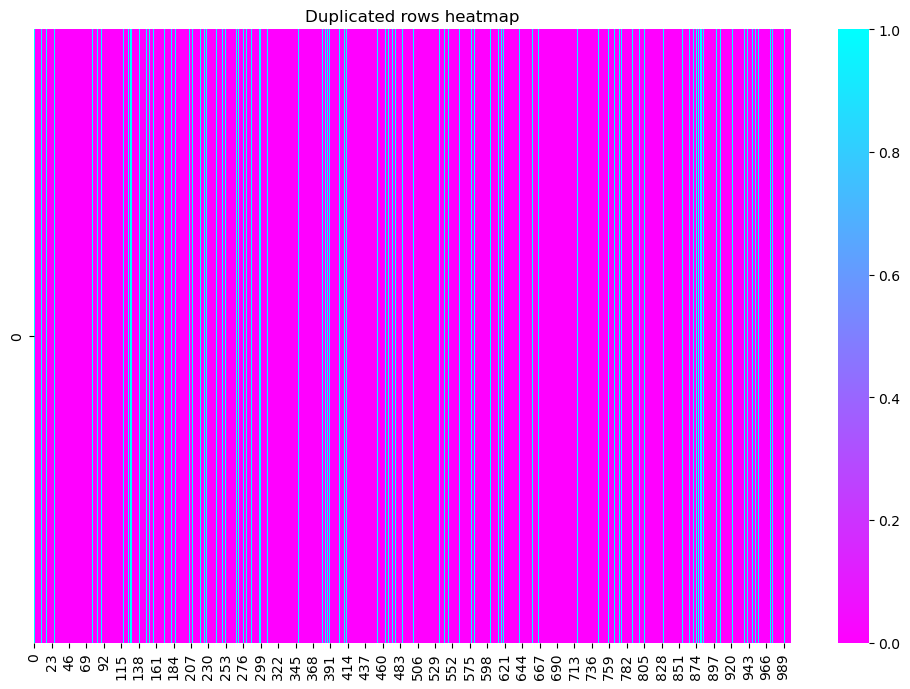

In [376]:
duplicated_rows = df[df.duplicated(keep=False)]
print("Duplicated rows count:", duplicated_rows.shape[0])

heatmap_data = df.duplicated().values
plt.figure(figsize=(10, 7))
sns.heatmap([heatmap_data], cmap='cool_r')
plt.title('Duplicated rows heatmap')
plt.show()


We have so many duplicated row, we have to delete these.

In [377]:
#Drop duplicate datas
dfToProcess=dfToProcess.drop_duplicates()
dfToProcess

,Flight Date,Airline,From,To,Flight Duration (min),Price
0,20.12.2023,Anadolujet,ADA,ESB,65,"936,99"
2,20.12.2023,Sunexpress,ADA,AYT,75,"1264,99"
3,20.12.2023,Sunexpress,ADA,AYT,75,"1464,99"
4,20.12.2023,Pegasus,ADA,AYT,65,"1579,99"
5,20.12.2023,Türk Hava Yolları,ADA,IST,110,"1492,99"
...,...,...,...,...,...,...
994,25.12.2023,Pegasus,SAW,VAN,130,"1484,99"
995,25.12.2023,Anadolujet,SAW,VAN,125,"1509,99"
996,25.12.2023,Sunexpress,ADB,KSY,130,"1614,99"
997,25.12.2023,Sunexpress,ADB,ASR,90,"1364,99"


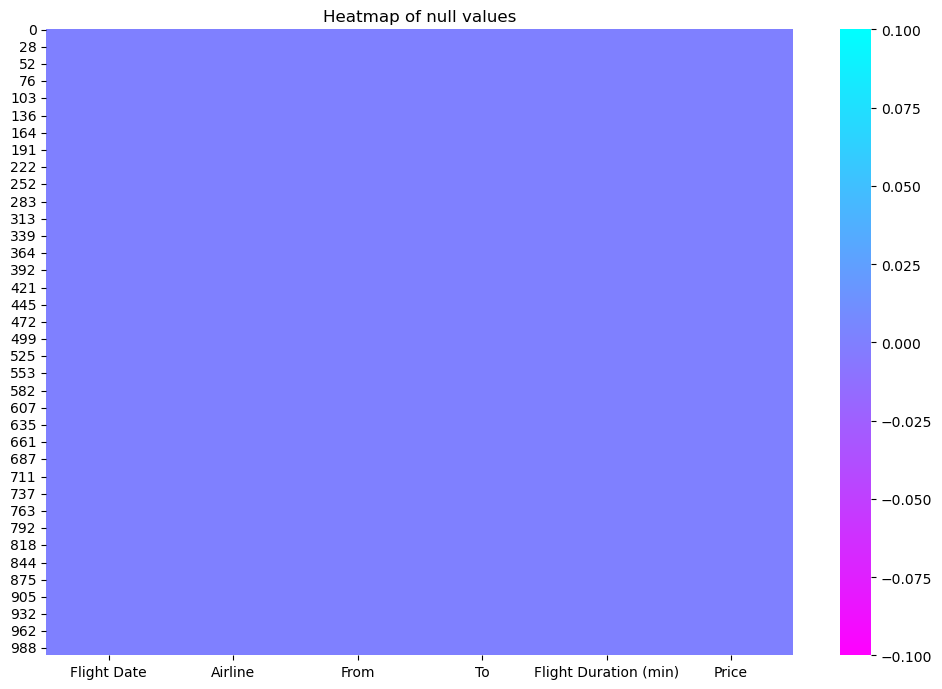

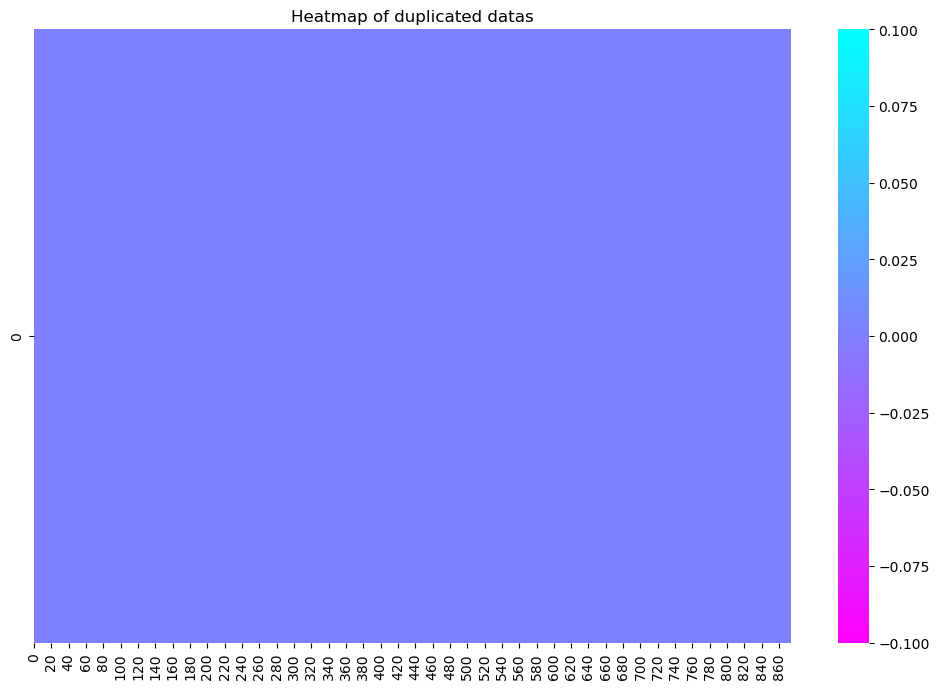

In [378]:
#Dataset doesn't contain null values.
plt.figure(figsize=(10,7))
sns.heatmap(dfToProcess.isnull(), cmap= 'cool_r')
plt.title('Heatmap of null values')
plt.show()

#Dataset doesn't contain duplicated values anymore.
heatmap_data = dfToProcess.duplicated().values
plt.figure(figsize=(10, 7))
sns.heatmap([heatmap_data], cmap='cool_r')
plt.title('Heatmap of duplicated datas')
plt.show()


In [379]:
df['Price'].unique()

array(['936,99', '1264,99', '1464,99', '1579,99', '1492,99', '1599,99',
       '1144,99', '1354,99', '1379,99', '1313,99', '1314,99', '1364,99',
       '1401,99', '630,99', '642,99', '741,99', '1050,99', '1149,99',
       '841,99', '941,99', '1297,99', '641,99', '992,99', '1150,99',
       '1148,99', '1249,99', '1514,99', '884,99', '590,99', '643,99',
       '1114,99', '1214,99', '1737,99', '1614,99', '1664,99', '1292,99',
       '1329,99', '1192,99', '1699,99', '1244,99', '1478,99', '1479,99',
       '1710,99', '1919,99', '1392,99', '1142,99', '1045,99', '784,99',
       '991,99', '1397,99', '1034,99', '1197,99', '1497,99', '1704,99',
       '559,99', '719,99', '1147,99', '679,99', '843,99', '993,99',
       '943,99', '1031,99', '966,99', '1385,99', '1334,99', '1585,99',
       '1338,99', '1359,99', '1047,99', '1486,99', '836,99', '1519,99',
       '1164,99', '1328,99', '1725,99', '670,99', '842,99', '1386,99',
       '1564,99', '578,99', '586,99', '1485,99', '1042,99', '1504,99',
   

In [380]:
df.head()

,Flight Date,Airline,From,To,Flight Duration (min),Price
0,20.12.2023,Anadolujet,ADA,ESB,65,"936,99"
1,20.12.2023,Anadolujet,ADA,ESB,65,"936,99"
2,20.12.2023,Sunexpress,ADA,AYT,75,"1264,99"
3,20.12.2023,Sunexpress,ADA,AYT,75,"1464,99"
4,20.12.2023,Pegasus,ADA,AYT,65,"1579,99"


In [381]:
df["Airline"].value_counts()


Airline
Anadolujet           367
Pegasus              261
Türk Hava Yolları    254
Sunexpress           117
Name: count, dtype: int64

In [382]:
print(df['Airline'].unique())
print(df['From'].unique())
print(df['To'].unique())



['Anadolujet' 'Sunexpress' 'Pegasus' 'Türk Hava Yolları']
['ADA' 'ESB' 'AYT' 'GZP' 'EDO' 'DIY' 'EZS' 'ERZ' 'GZT' 'HTY' 'IST' 'SAW'
 'ADB' 'TZX']
['ESB' 'AYT' 'IST' 'SAW' 'ADB' 'VAN' 'GZP' 'DIY' 'EZS' 'ERZ' 'GZT' 'KSY'
 'MLX' 'BJV' 'OGU' 'RZV' 'GNY' 'TZX' 'ASR' 'SZF' 'KYA' 'DLM' 'NAV' 'NOP'
 'VAS']


In [383]:
print(df['Flight Date'].isnull().values.any())
print(df['Airline'].isnull().values.any())
print(df['From'].isnull().values.any())
print(df['To'].isnull().values.any())
print(df['Flight Duration (min)'].isnull().values.any())

False
False
False
False
False


## Encoding Dates

In [384]:
dfToProcess['Flight Date'] = pd.to_datetime(dfToProcess['Flight Date'], format='%d.%m.%Y', dayfirst=True)
dfToProcess['DayOfWeek']=dfToProcess['Flight Date'].dt.dayofweek
dfToProcess.drop('Flight Date',axis=1,inplace=True)
dfToProcess = pd.get_dummies(dfToProcess, columns=["DayOfWeek"], dtype=int)
dfToProcess


,Airline,From,To,Flight Duration (min),Price,DayOfWeek_0,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6
0,Anadolujet,ADA,ESB,65,"936,99",0,1,0,0,0,0
2,Sunexpress,ADA,AYT,75,"1264,99",0,1,0,0,0,0
3,Sunexpress,ADA,AYT,75,"1464,99",0,1,0,0,0,0
4,Pegasus,ADA,AYT,65,"1579,99",0,1,0,0,0,0
5,Türk Hava Yolları,ADA,IST,110,"1492,99",0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
994,Pegasus,SAW,VAN,130,"1484,99",1,0,0,0,0,0
995,Anadolujet,SAW,VAN,125,"1509,99",1,0,0,0,0,0
996,Sunexpress,ADB,KSY,130,"1614,99",1,0,0,0,0,0
997,Sunexpress,ADB,ASR,90,"1364,99",1,0,0,0,0,0


#### Why we used dummy for dates?

We could have used day of week as index. for example 0 for Monday if we do like this, machine could find wrong relative between columns. Like ratio etc. and it's undesirable

## Processing for Price Column

In [385]:
dfToProcess['Price']=dfToProcess['Price'].str.replace(',', '.').astype(float)
dfToProcess

,Airline,From,To,Flight Duration (min),Price,DayOfWeek_0,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6
0,Anadolujet,ADA,ESB,65,936.99,0,1,0,0,0,0
2,Sunexpress,ADA,AYT,75,1264.99,0,1,0,0,0,0
3,Sunexpress,ADA,AYT,75,1464.99,0,1,0,0,0,0
4,Pegasus,ADA,AYT,65,1579.99,0,1,0,0,0,0
5,Türk Hava Yolları,ADA,IST,110,1492.99,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
994,Pegasus,SAW,VAN,130,1484.99,1,0,0,0,0,0
995,Anadolujet,SAW,VAN,125,1509.99,1,0,0,0,0,0
996,Sunexpress,ADB,KSY,130,1614.99,1,0,0,0,0,0
997,Sunexpress,ADB,ASR,90,1364.99,1,0,0,0,0,0


## Encoding with Dummy

In [386]:
dfToProcess = pd.get_dummies(dfToProcess, columns=["Airline","From","To"], dtype=int)
dfToProcess

,Flight Duration (min),Price,DayOfWeek_0,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,Airline_Anadolujet,Airline_Pegasus,...,To_MLX,To_NAV,To_NOP,To_OGU,To_RZV,To_SAW,To_SZF,To_TZX,To_VAN,To_VAS
0,65,936.99,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,75,1264.99,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,75,1464.99,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,65,1579.99,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,110,1492.99,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,130,1484.99,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
995,125,1509.99,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
996,130,1614.99,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,90,1364.99,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# VISUALIZATION

Flight Price Distrubition

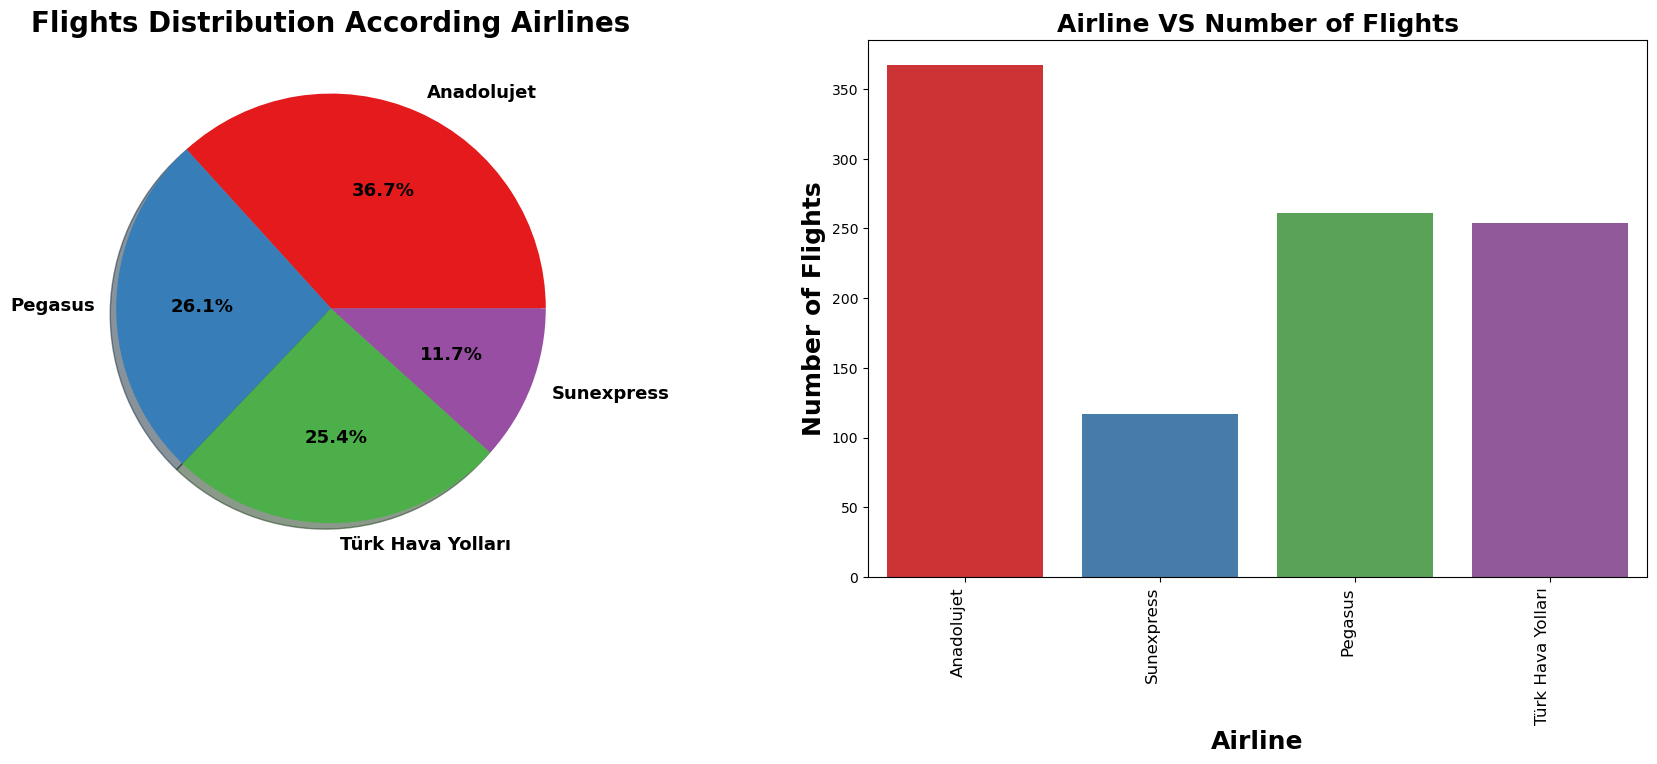

In [387]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart
df['Airline'].value_counts().plot.pie(
    autopct='%2.1f%%',
    textprops={'fontsize': 13, 'fontweight': 'bold'},
    ax=ax[0],
    shadow=True
)
ax[0].set_title('Flights Distribution According Airlines', fontsize=20, fontweight='bold')
ax[0].set_ylabel('')

# Count plot
sns.countplot(x='Airline', data=df, ax=ax[1])  # Specify 'x' parameter
ax[1].set_title('Airline VS Number of Flights', fontsize=18, fontweight='bold')
ax[1].set_xlabel("Airline", fontsize=18, fontweight='bold')
ax[1].set_ylabel("Number of Flights", fontsize=18, fontweight='bold')
plt.xticks(fontsize=12, rotation=90, ha='right')
plt.tight_layout(pad=2)
plt.show()


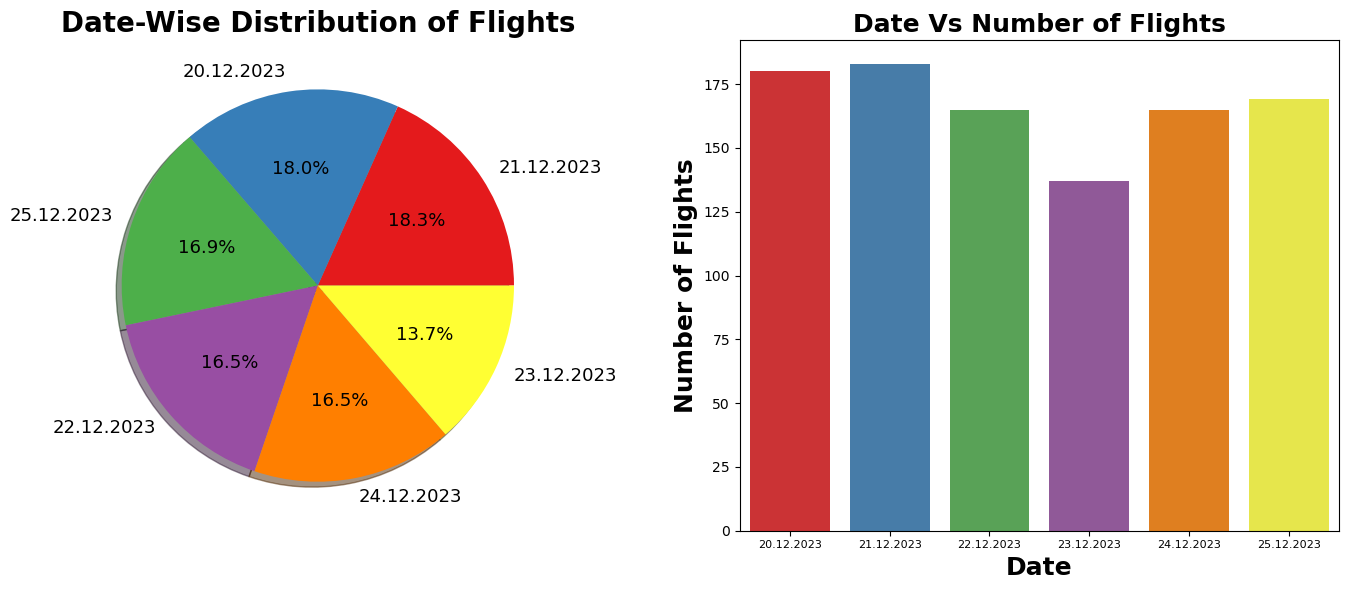

In [418]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
f, ax = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart
df['Flight Date'].value_counts().plot.pie(
    autopct='%2.1f%%',
    textprops={'fontsize': 13},
    ax=ax[0],
    shadow=True
)
ax[0].set_title('Date-Wise Distribution of Flights', fontsize=20, fontweight='bold')
ax[0].set_ylabel('')
df
# Count plot
sns.countplot(x='Flight Date', data=df, ax=ax[1])
ax[1].set_title('Date Vs Number of Flights', fontsize=18, fontweight='bold')
ax[1].set_xlabel("Date", fontsize=18, fontweight='bold')
ax[1].set_ylabel("Number of Flights", fontsize=18, fontweight='bold')
plt.xticks(fontsize=8)
plt.tight_layout()
plt.show()


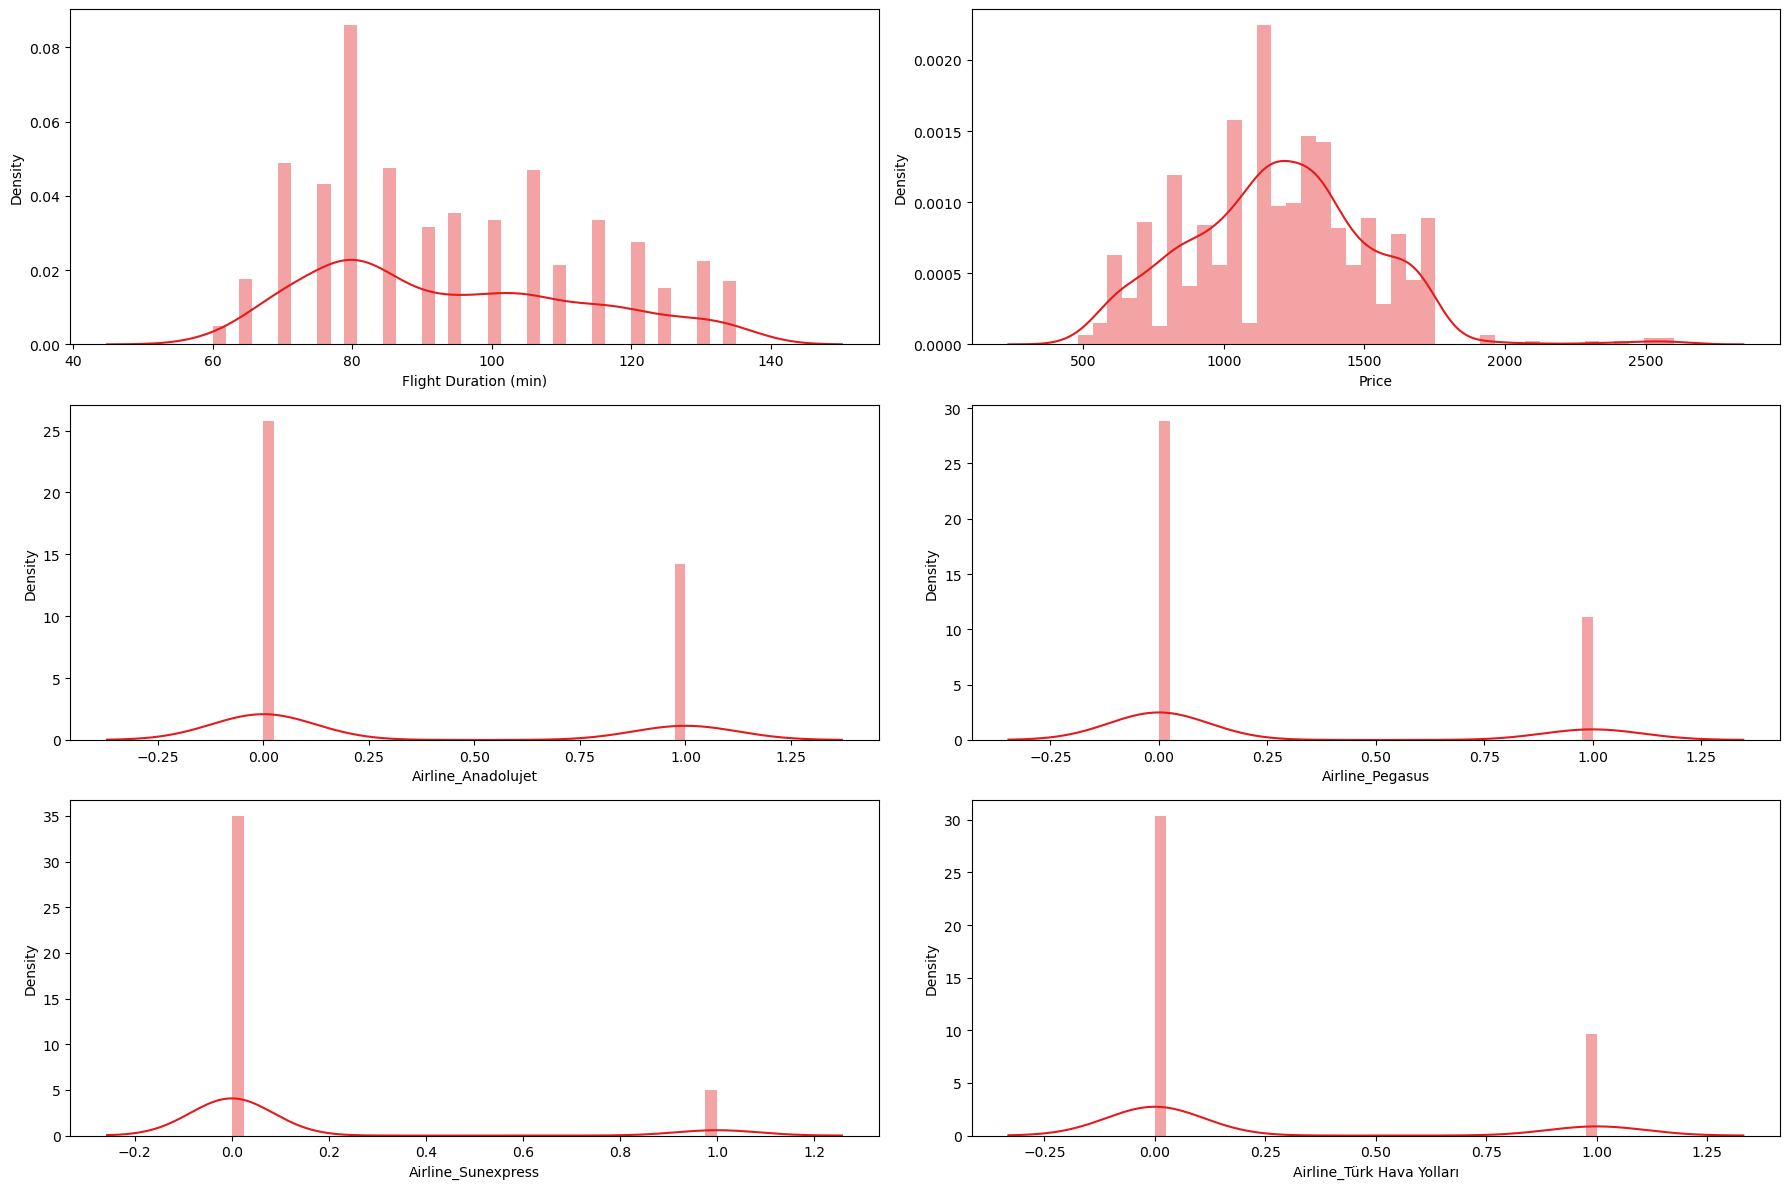

In [389]:
columns = ['Flight Duration (min)','Price','Airline_Anadolujet','Airline_Pegasus','Airline_Sunexpress','Airline_Türk Hava Yolları']


def distplot(nrows, ncols, columns):

    rows=nrows
    cols=ncols

    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(18, 12))

    columns = columns
    index=0

    for i in range(rows):
        for j in range(cols):
            sns.distplot(dfToProcess[columns[index]], ax=ax[i][j], bins=40)
            index+=1

        
distplot(3, 2, columns)

Actually its hard to get meaning from encoded data like airline columns. But we can consider it like there is flight or no-flight ratio via looking to depth between 1 and 0.

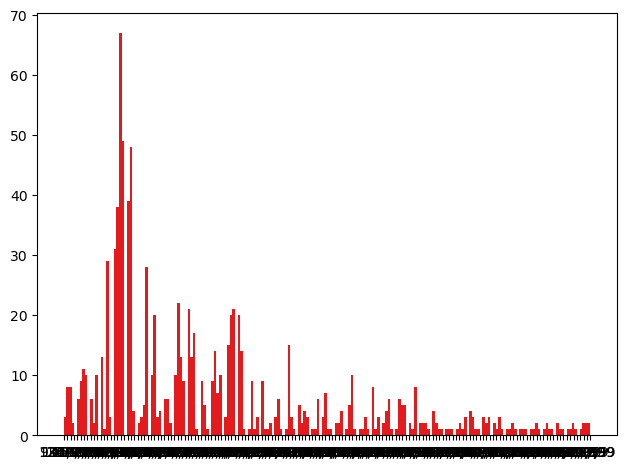

In [390]:
# noise histogram
plt.figure()
plt.hist(df['Price'], bins=200)
plt.show()

<Axes: >

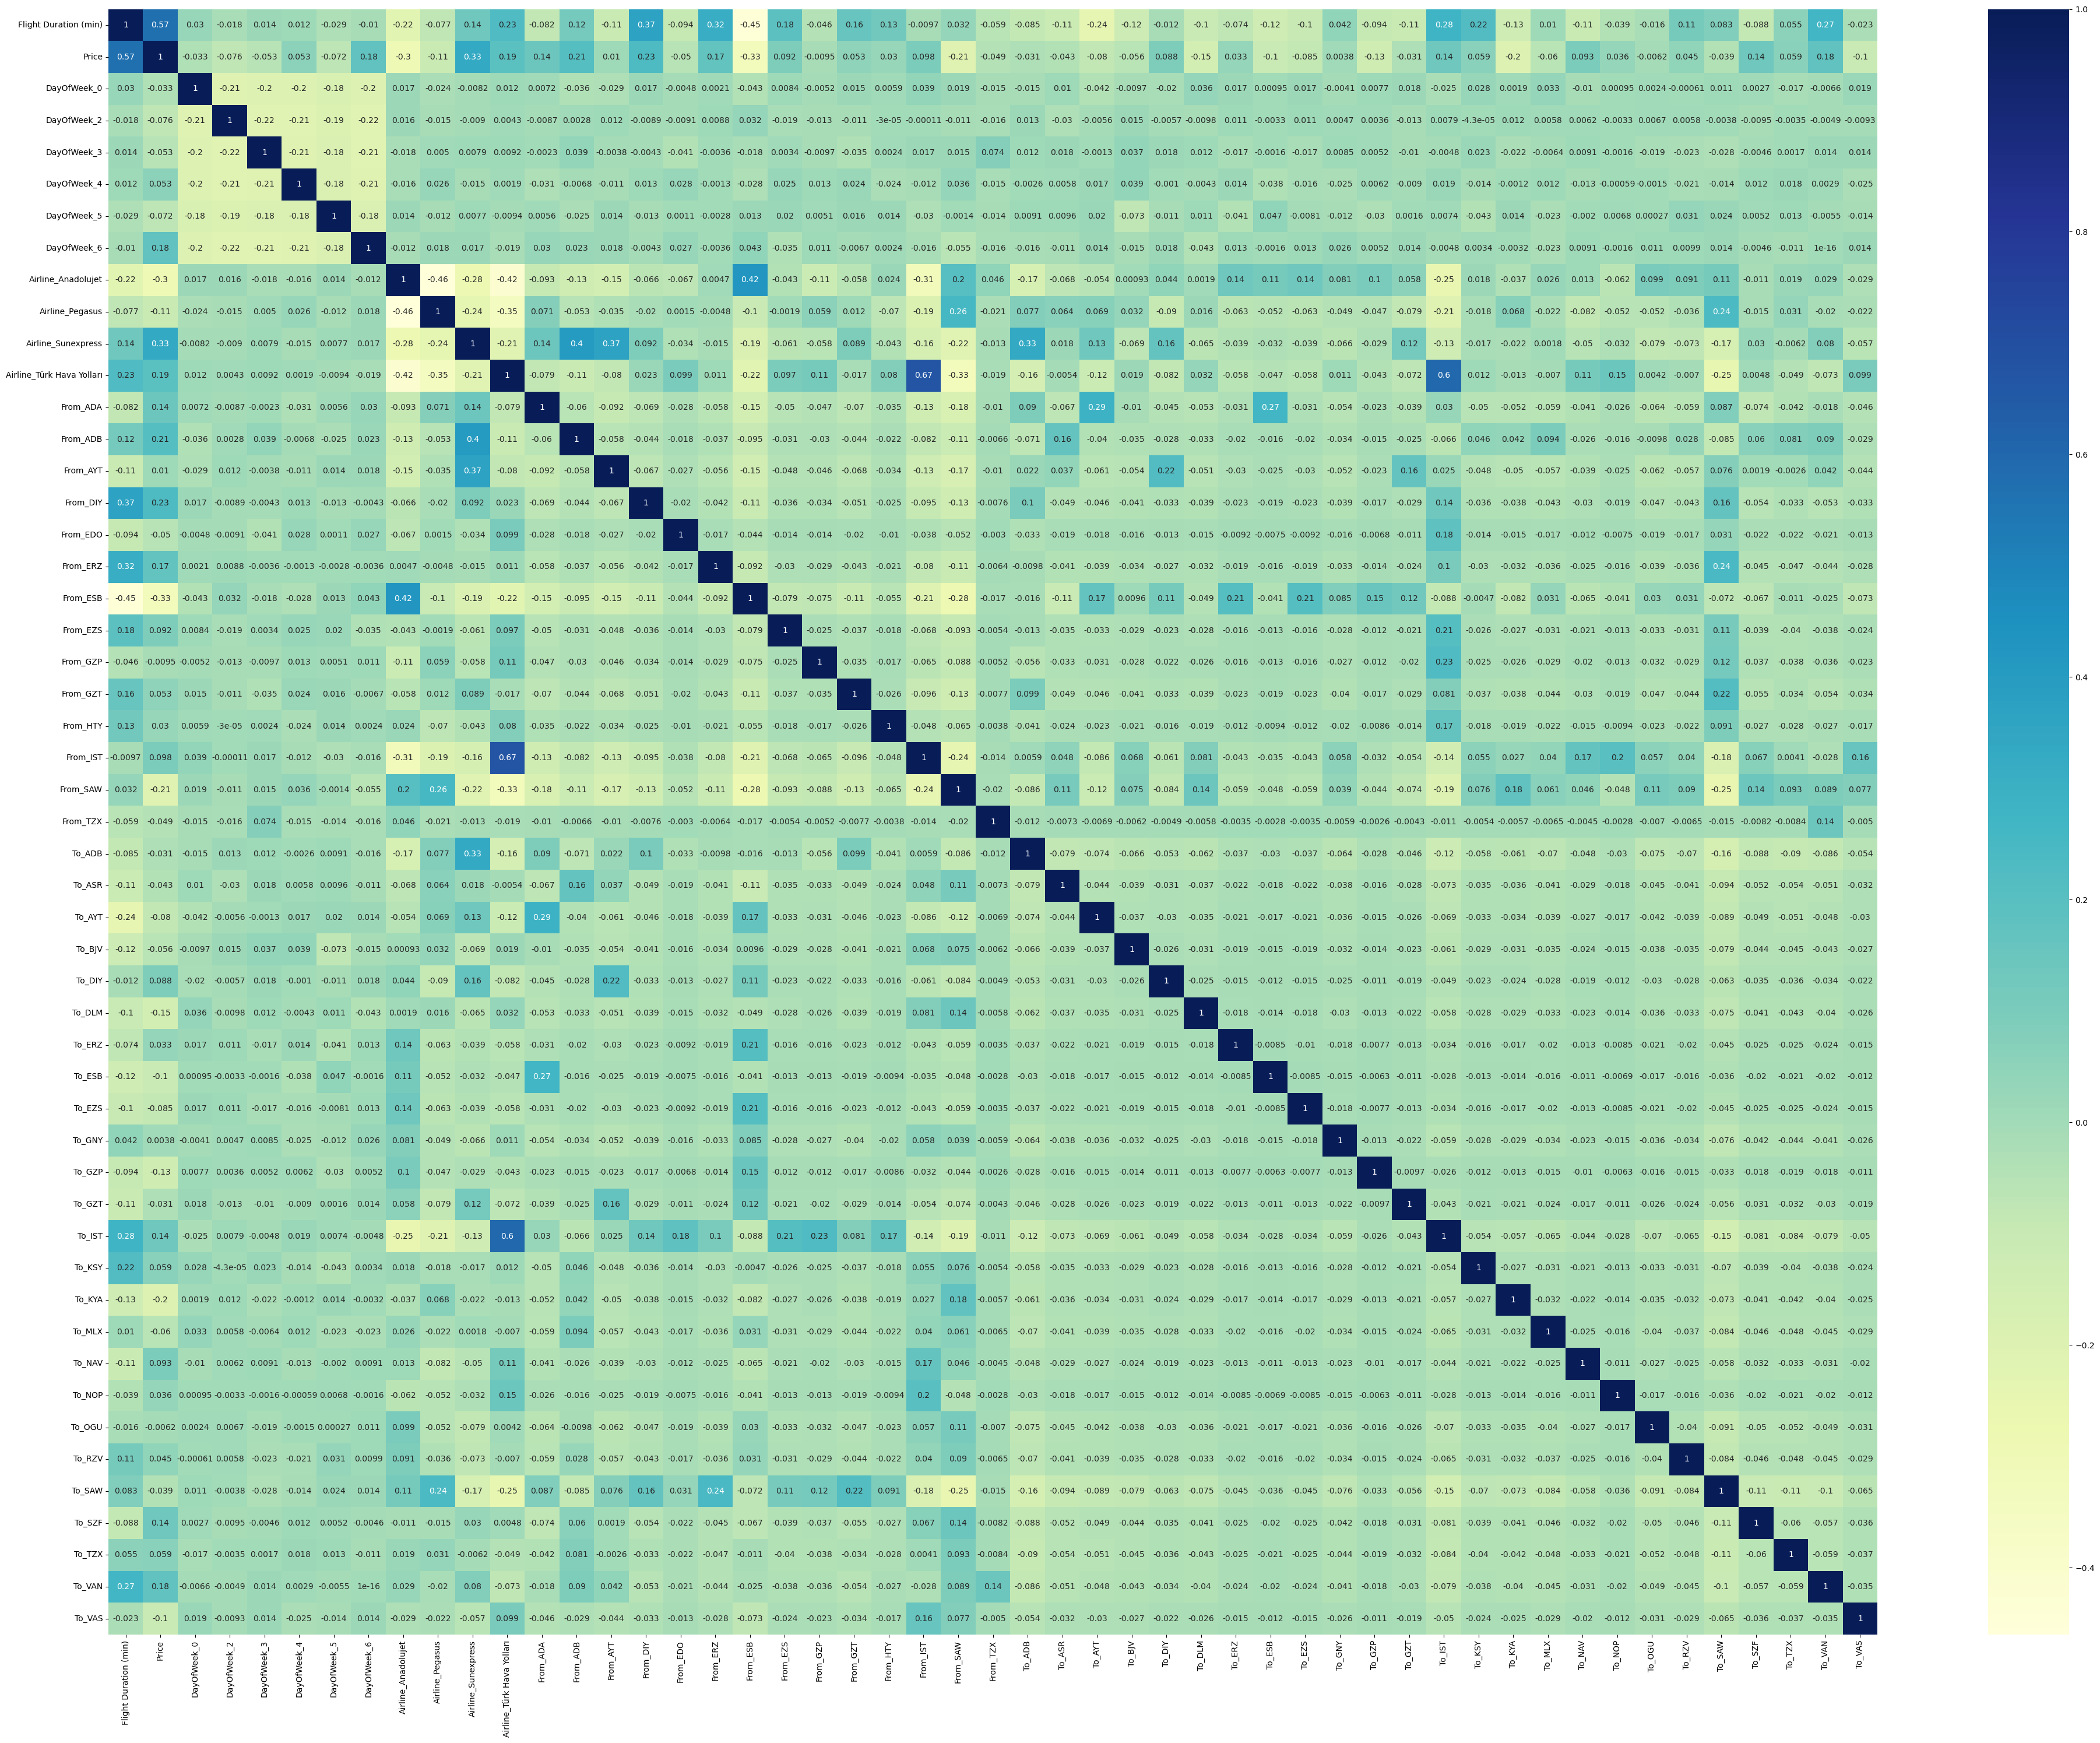

In [391]:
# Correlation of attributes via heatmap
plt.figure(figsize=(40,30))
corr_matrix = dfToProcess.corr()
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")

In [392]:
dfToProcess.corr()


,Flight Duration (min),Price,DayOfWeek_0,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,Airline_Anadolujet,Airline_Pegasus,...,To_MLX,To_NAV,To_NOP,To_OGU,To_RZV,To_SAW,To_SZF,To_TZX,To_VAN,To_VAS
Flight Duration (min),1.000000,0.571959,0.030027,-0.018327,0.014364,0.011630,-0.028649,-1.033675e-02,-0.224886,-0.076706,...,0.010166,-0.108974,-0.038799,-0.015750,0.112984,0.082568,-0.088094,0.054829,2.686722e-01,-0.023421
Price,0.571959,1.000000,-0.033470,-0.076307,-0.053029,0.053261,-0.072091,1.762542e-01,-0.299017,-0.109869,...,-0.059789,0.093252,0.035627,-0.006170,0.044817,-0.038878,0.135452,0.058967,1.762843e-01,-0.103934
DayOfWeek_0,0.030027,-0.033470,1.000000,-0.207699,-0.202089,-0.198862,-0.176557,-2.020886e-01,0.017076,-0.024096,...,0.032925,-0.010438,0.000946,0.002357,-0.000614,0.010605,0.002742,-0.017017,-6.579707e-03,0.019420
DayOfWeek_2,-0.018327,-0.076307,-0.207699,1.000000,-0.216371,-0.212916,-0.189034,-2.163708e-01,0.016144,-0.014610,...,0.005779,0.006192,-0.003288,0.006728,0.005779,-0.003793,-0.009533,-0.003518,-4.893394e-03,-0.009285
DayOfWeek_3,0.014364,-0.053029,-0.202089,-0.216371,1.000000,-0.207165,-0.183928,-2.105263e-01,-0.018380,0.004980,...,-0.006386,0.009095,-0.001589,-0.019152,-0.022706,-0.027553,-0.004609,0.001680,1.351845e-02,0.014400
DayOfWeek_4,0.011630,0.053261,-0.198862,-0.212916,-0.207165,1.000000,-0.180991,-2.071647e-01,-0.015905,0.026224,...,0.012380,-0.012685,-0.000592,-0.001475,-0.020608,-0.014199,0.011675,0.017750,2.876236e-03,-0.025467
DayOfWeek_5,-0.028649,-0.072091,-0.176557,-0.189034,-0.183928,-0.180991,1.000000,-1.839282e-01,0.014420,-0.012141,...,-0.023137,-0.001955,0.006794,0.000267,0.030597,0.023646,0.005158,0.013276,-5.466025e-03,-0.014322
DayOfWeek_6,-0.010337,0.176254,-0.202089,-0.216371,-0.210526,-0.207165,-0.183928,1.000000e+00,-0.012071,0.018455,...,-0.022706,0.009095,-0.001589,0.011227,0.009934,0.013598,-0.004609,-0.011198,1.022063e-16,0.014400
Airline_Anadolujet,-0.224886,-0.299017,0.017076,0.016144,-0.018380,-0.015905,0.014420,-1.207051e-02,1.000000,-0.460076,...,0.025919,0.012515,-0.061639,0.099055,0.090569,0.113086,-0.010762,0.019494,2.874839e-02,-0.028521
Airline_Pegasus,-0.076706,-0.109869,-0.024096,-0.014610,0.004980,0.026224,-0.012141,1.845508e-02,-0.460076,1.000000,...,-0.022353,-0.082004,-0.051595,-0.051520,-0.036160,0.237260,-0.015083,0.030727,-2.046562e-02,-0.022461


# Training & Test Data Split


In [393]:
#Required libraries 
from sklearn.model_selection import learning_curve, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [394]:
#Data Spliting as Train-Test
from sklearn.model_selection import train_test_split
X = dfToProcess.drop(['Price'], axis=1)
Y = dfToProcess['Price']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=8 )

print('x_train :', x_train.shape)
print('x_test :', x_test.shape)
print('y_train :', y_train.shape)
print('y_test :', y_test.shape)


x_train : (699, 50)
x_test : (175, 50)
y_train : (699,)
y_test : (175,)


# Training

In [395]:
from sklearn.linear_model import LinearRegression

<b>Lineer Regression Algorithm</b>

In [396]:
# Lineer Regression Train
lr = LinearRegression()
lr.fit(x_train,y_train)
# 
y_predict = lr.predict(x_test) # testing lr model
y_predict  #predicted values


array([1316.50937592,  891.53721881,  780.40728098, 1042.56629387,
       1894.96222824,  868.71312503,  860.28470283, 1195.6472945 ,
       1157.88120125, 1596.05731691, 1535.70810097, 1002.83325141,
        717.79508942, 1285.34376769, 1196.84044063, 1571.96271285,
       1122.32207426, 1496.25115724, 1480.17315525, 1172.785317  ,
       1283.74006422,  978.00616352,  832.04962955, 1246.87589697,
        871.96972486,  984.75054567, 1530.37635378,  861.88840631,
        953.98700869, 1154.50358464, 1391.04084353, 1164.98383716,
       1492.62000984, 1127.24934835, 1128.18098782, 1471.49769669,
       1686.75198984, 1176.26479314, 1491.87240713, 1442.39026817,
       1527.94224202, 1008.46437244, 1127.24934835,  646.11726015,
       1447.06106422, 1281.77542119, 1139.03695722, 1563.81657994,
        760.60530202, 1298.75624632, 1269.10322328,  770.68662057,
       1724.06607095,  783.7308516 , 1438.49988461,  954.82694942,
        922.99991955,  713.43835029, 1137.46493654, 1451.46215

In [397]:
# metrics
print('mean absolute error: ',mean_absolute_error(y_test, y_predict))
print(' root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict))

mean absolute error:  146.68050349508457
 root mean squared error:  203.97597763435505
Coefficient of determination R^2:  0.6030921762193038


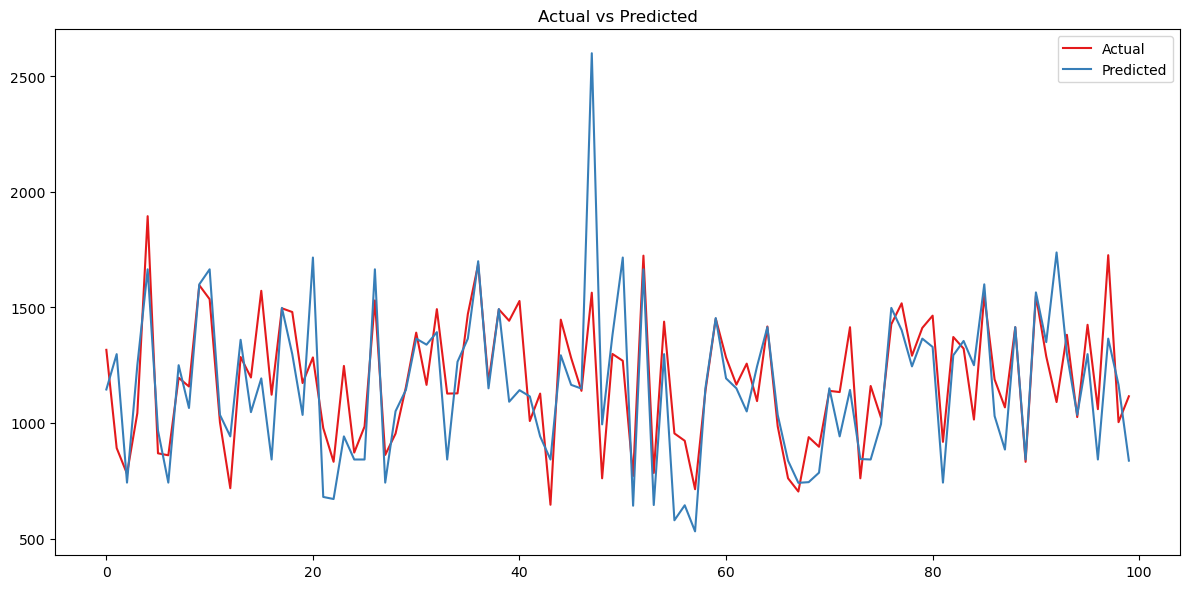

In [398]:
# predicted values VS real values
fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

<b>DecisionTree Algorithm</b>

mean absolute error:  142.77714285714285
 root mean squared error:  198.74987151837718
Coefficient of determination R^2:  0.6231701250364978


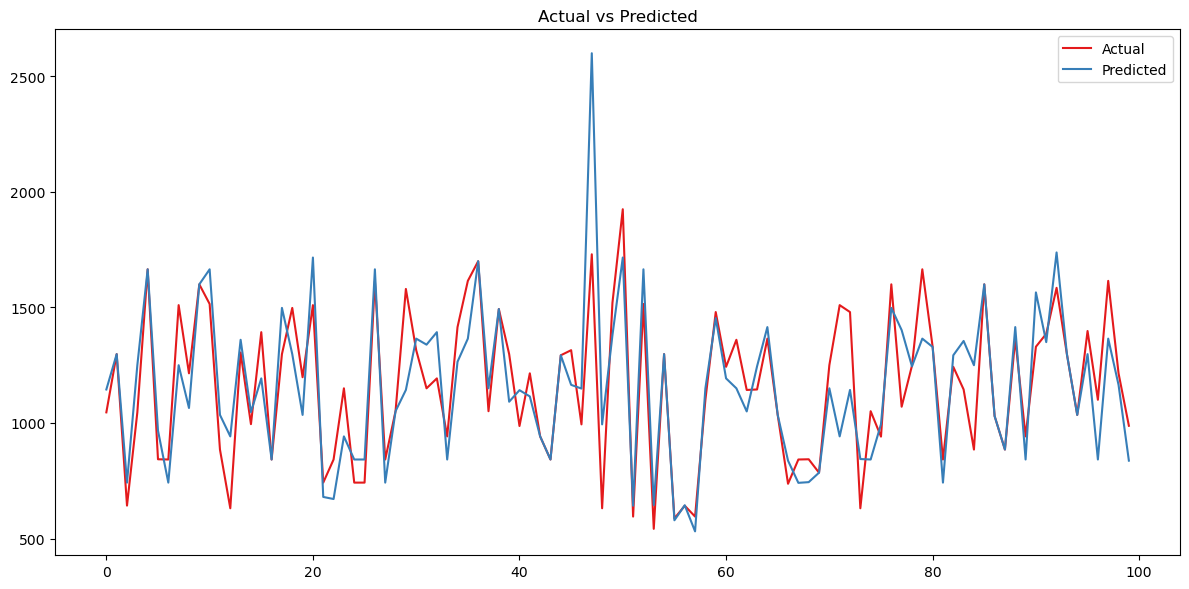

In [399]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(criterion='poisson',splitter='best')
dt.fit(x_train,y_train)
y_predict_dt = dt.predict(x_test)
print('mean absolute error: ',mean_absolute_error(y_test, y_predict_dt))
print(' root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict_dt)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_dt))

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_dt,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()


<b>Lasso Algorithm</b>

mean absolute error:  145.6873233139231
 root mean squared error:  203.67370847676486
Coefficient of determination R^2:  0.6042676489565568


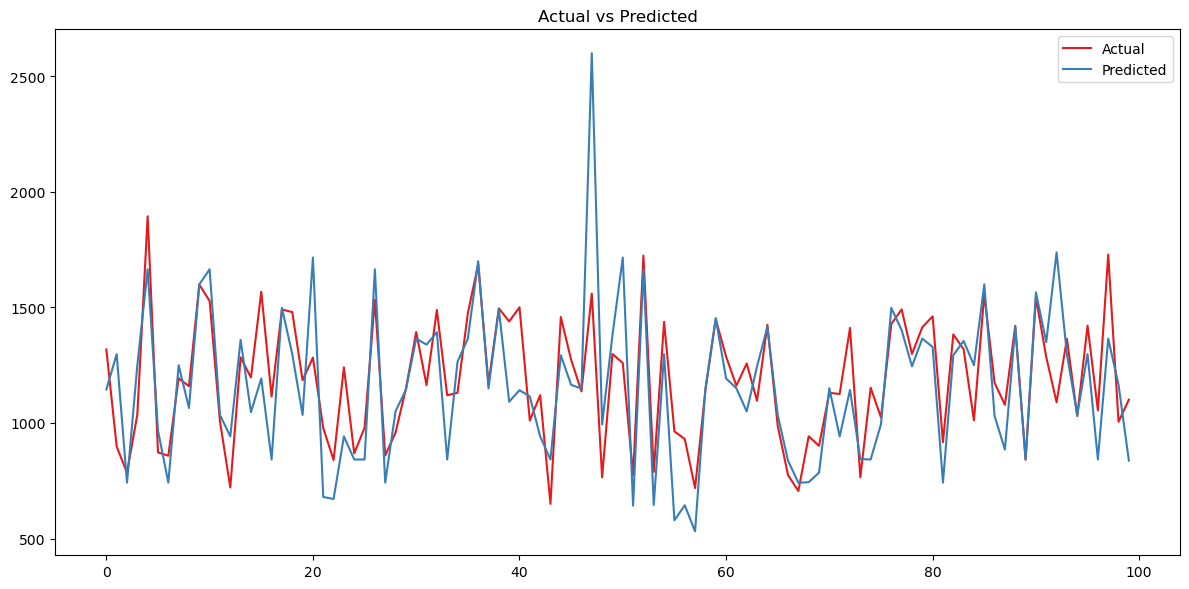

In [415]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
y_predict_lasso = lasso.predict(x_test) 
print('mean absolute error: ',mean_absolute_error(y_test, y_predict_lasso))
print(' root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict_lasso)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_lasso))

# Lasso prediction visualization
fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_lasso,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

<b>RandomForest Algorithm</b>

mean absolute error:  115.80109612244912
root mean squared error:  160.76194088684585
Coefficient of determination R^2:  0.7534539240288662


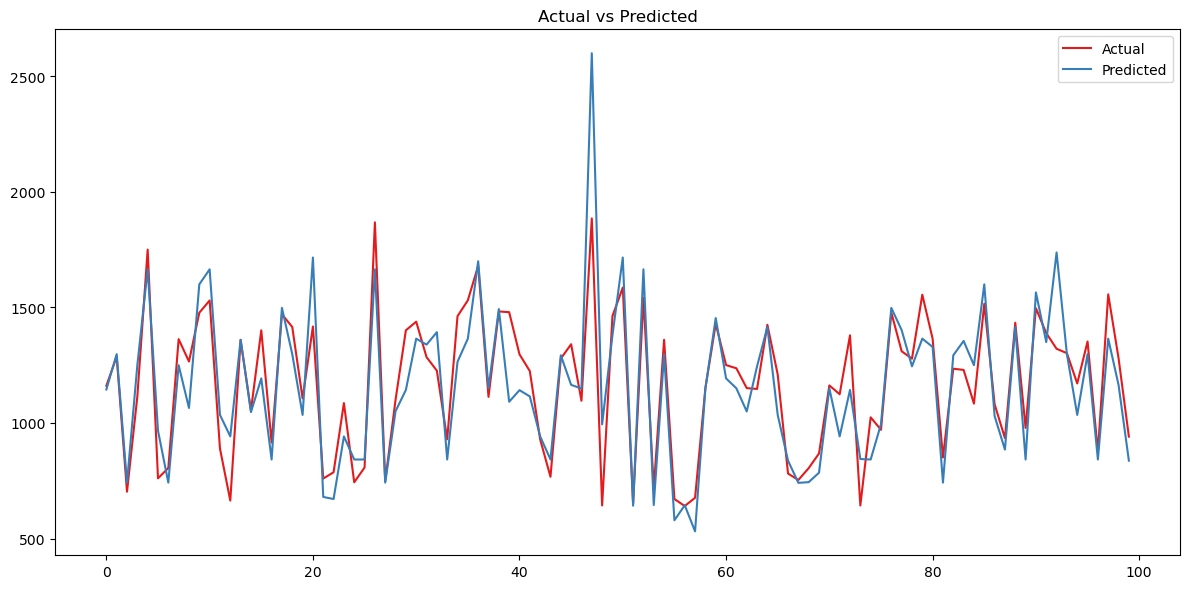

In [453]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_predict_rf = rf.predict(x_test)
print('mean absolute error: ',mean_absolute_error(y_test, y_predict_rf))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict_rf)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_rf))

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_rf,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

modelToServe=rf

<b>SVR (Support Vector Regression) Algorithm</b>

mean absolute error:  131.4690051373106
root mean squared error:  193.13086911049058
Coefficient of determination R^2:  0.6441761922821035


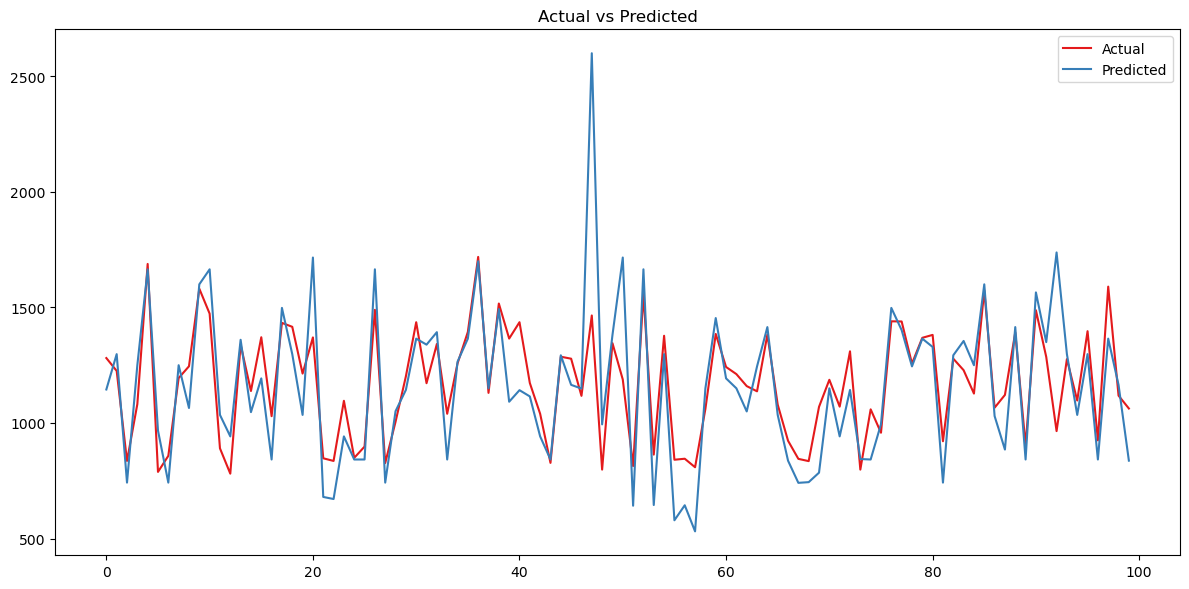

In [402]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
scaler = StandardScaler()

model = make_pipeline(scaler, SVR(C=99.8, epsilon=8))
model.fit(x_train, y_train)

y_prediction = model.predict(x_test)

print('mean absolute error: ',mean_absolute_error(y_test, y_prediction))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_prediction)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_prediction))


fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_prediction,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()




<b>Ridge Algorithm</b>

mean absolute error:  146.01628756544554
root mean squared error:  203.82294014688543
Coefficient of determination R^2:  0.603687530538791


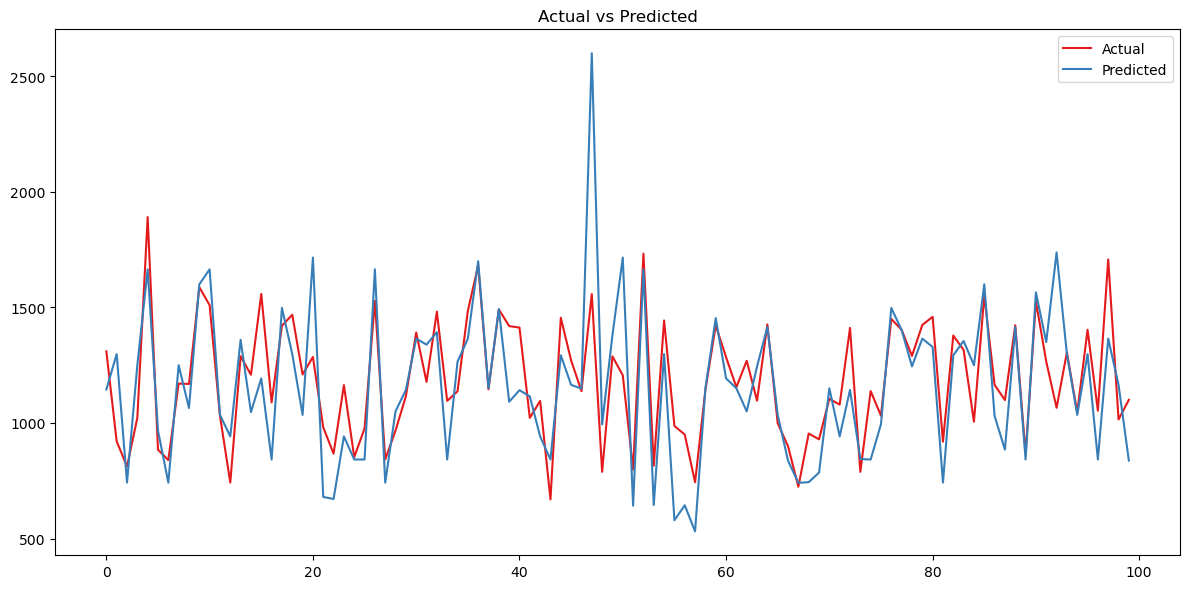

In [403]:
#Ridge
from sklearn.linear_model import Ridge
# training
model = Ridge(alpha=3)
model.fit(x_train, y_train)

# prediction
y_prediction = model.predict(x_test)

print('mean absolute error: ',mean_absolute_error(y_test, y_prediction))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_prediction)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_prediction))


fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_prediction,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

<b>ElasticNet Algorithm</b>

mean absolute error:  146.12950398444553
root mean squared error:  203.7801654478449
Coefficient of determination R^2:  0.6038538549749798


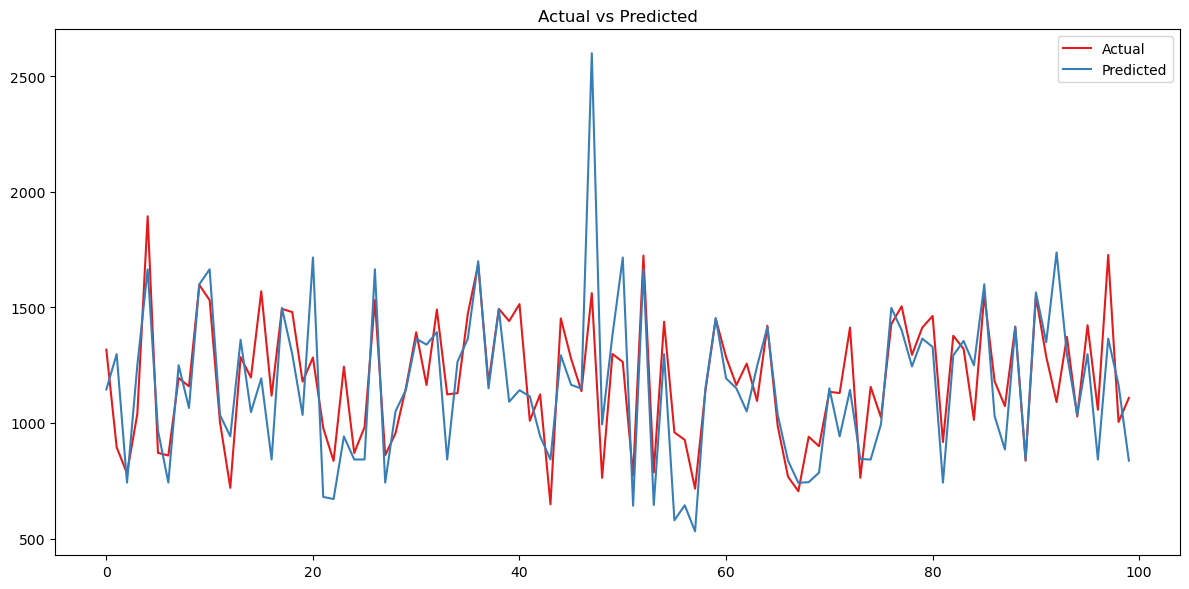

In [404]:
#ElasticNet
from sklearn.linear_model import ElasticNet

# training
model = ElasticNet(alpha=0.05, l1_ratio=1.00)
model.fit(x_train, y_train)

# prediction
y_prediction = model.predict(x_test)

print('mean absolute error: ',mean_absolute_error(y_test, y_prediction))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_prediction)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_prediction))

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_prediction,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

<b>Xgboost Algorithm</b>

mean absolute error:  123.30934859095981
root mean squared error:  178.38456932734556
Coefficient of determination R^2:  0.6964388555600262


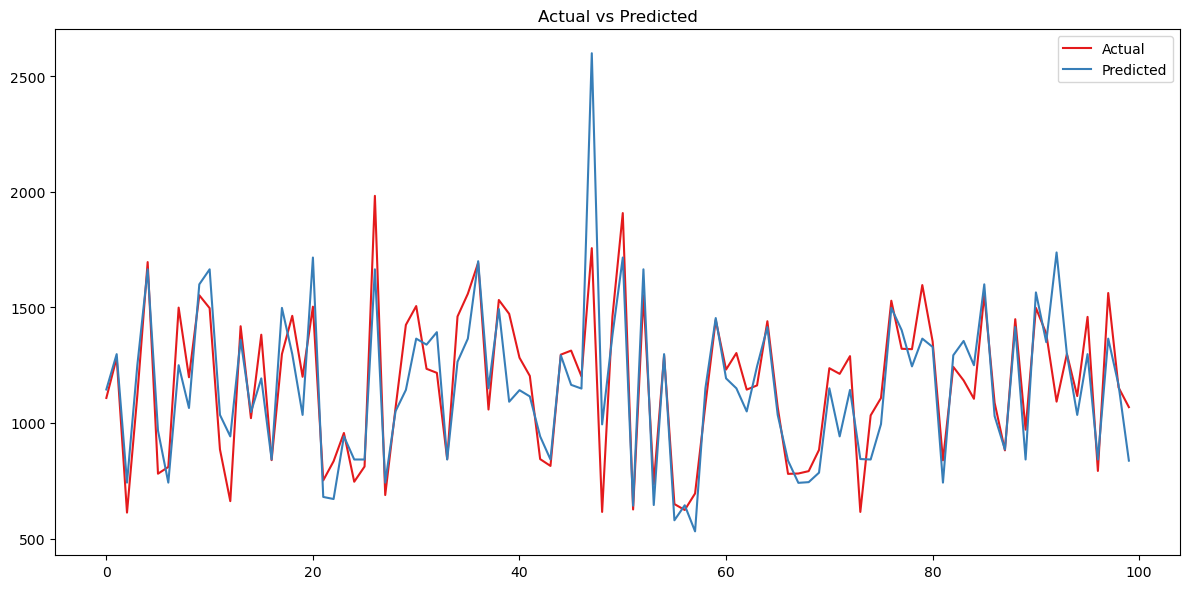

In [405]:
import xgboost as xgb

# training
model = xgb.XGBRegressor(objective ='reg:squarederror')
model.fit(x_train, y_train)

# prediction
y_prediction = model.predict(x_test)


print('mean absolute error: ',mean_absolute_error(y_test, y_prediction))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_prediction)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_prediction))

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_prediction,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

<b>KNN Algorithm</b>

mean absolute error:  132.40761904761905
root mean squared error:  194.32490139348405
Coefficient of determination R^2:  0.6397628275986547


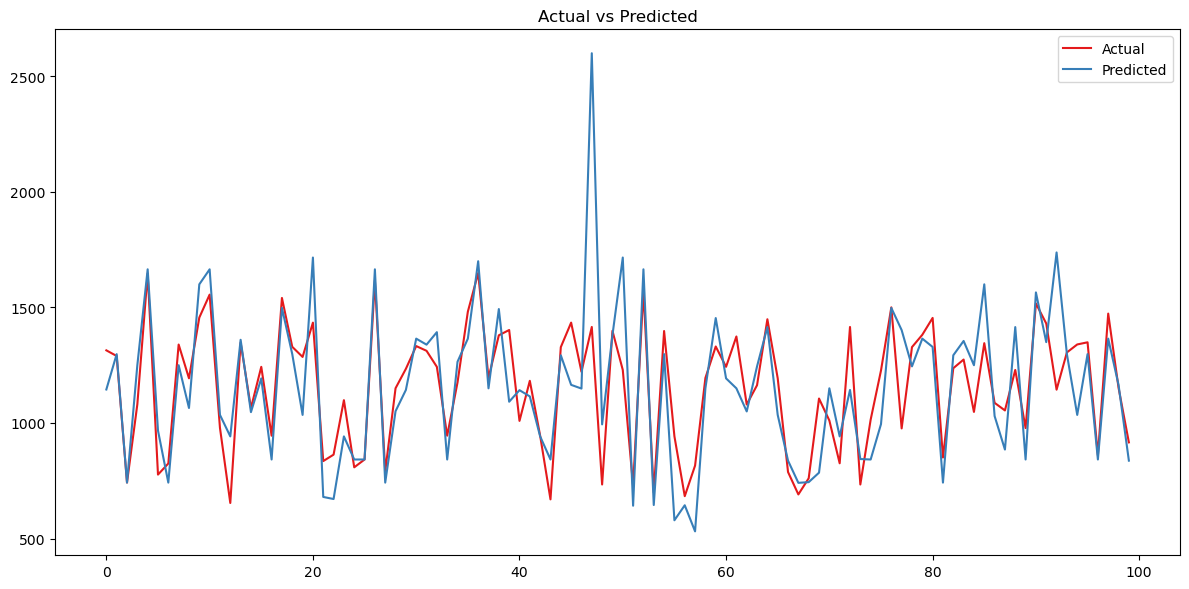

In [406]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=6)
model.fit(x_train, y_train)
y_prediction = model.predict(x_test)


print('mean absolute error: ',mean_absolute_error(y_test, y_prediction))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_prediction)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_prediction))

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_prediction,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()


mean absolute error:  125.99728851540581
root mean squared error:  180.17034876184886
Coefficient of determination R^2:  0.6903306293229812


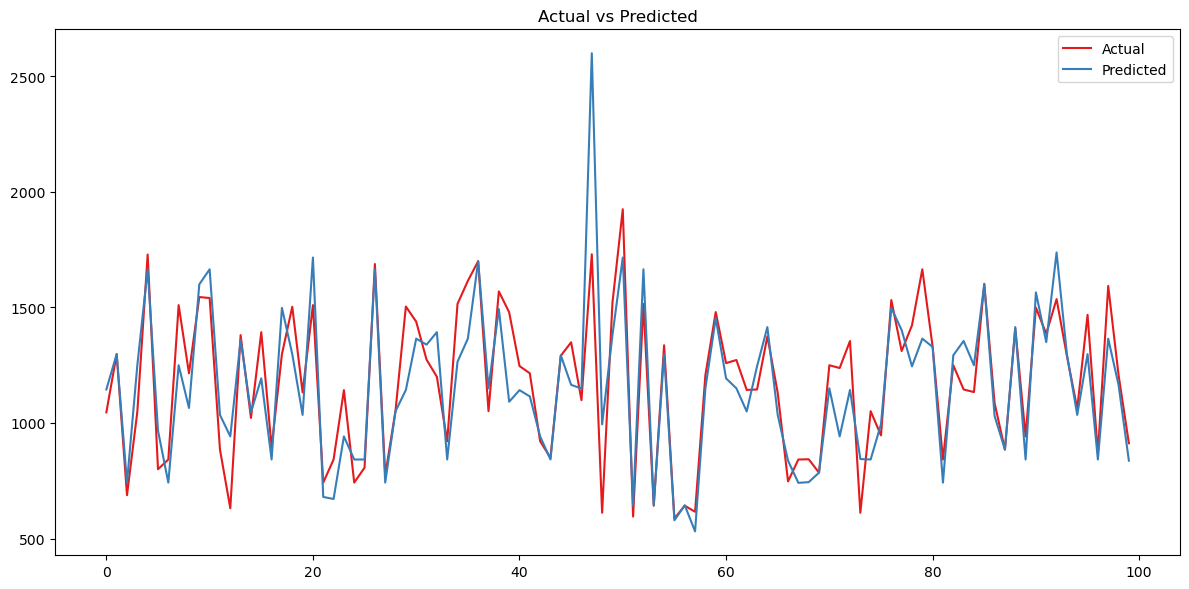

In [447]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor(n_estimators=170, random_state=150)
# training
model.fit(x_train, y_train)

# prediction
y_prediction = model.predict(x_test)

print('mean absolute error: ',mean_absolute_error(y_test, y_prediction))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_prediction)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_prediction))

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_prediction,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()


In [448]:
final_RMSE = pd.DataFrame( data  = [[203.97, 201.126,203.673,164.862,193.130, 203.822,203.780,178.384, 194.324,180.170],
                                    [0.603,0.614,0.614,0.740,0.644,0.603,0.603,0.696, 0.639,0.690]],
                          columns  = ['Linear Regression','Decision Tree Regressor','Lasso','Random Forest Regressor','SVR','Ridge','ElasticNet','Xgboost','KNN','Extra Trees Regressor'],
                         index =['RMSE','R2'])


final_RMSE = final_RMSE.T

cm = sns.light_palette('green', as_cmap=True)

final_RMSE = final_RMSE.style.background_gradient(cmap=cm)
final_RMSE

,RMSE,R2
Linear Regression,203.970000,0.603000
Decision Tree Regressor,201.126000,0.614000
Lasso,203.673000,0.614000
Random Forest Regressor,164.862000,0.740000
SVR,193.130000,0.644000
Ridge,203.822000,0.603000
ElasticNet,203.780000,0.603000
Xgboost,178.384000,0.696000
KNN,194.324000,0.639000
Extra Trees Regressor,180.170000,0.690000


# Fine Tuning Grid Search


We will implement this for Random Forest Regressor to find best results under best parameters.

In [449]:
from sklearn.model_selection import GridSearchCV
params_grid = {
    'n_estimators':[20,50,70,110,150,170,200,230,250],
    'max_leaf_nodes':list(range(2,25))}


grid_search = GridSearchCV(RandomForestRegressor(min_samples_split=2,bootstrap=False,random_state=42), params_grid, verbose=1, cv=3)

grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 207 candidates, totalling 621 fits


GridSearchCV(cv=3,
             estimator=RandomForestRegressor(bootstrap=False, random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24],
                         'n_estimators': [20, 50, 70, 110, 150, 170, 200, 230,
                                          250]},
             verbose=1)

In [450]:
grid_search.best_params_

{'max_leaf_nodes': 24, 'n_estimators': 20}

mean absolute error:  139.1288354191763
root mean squared error:  184.3133868424101
Coefficient of determination R^2:  0.6759251175505758


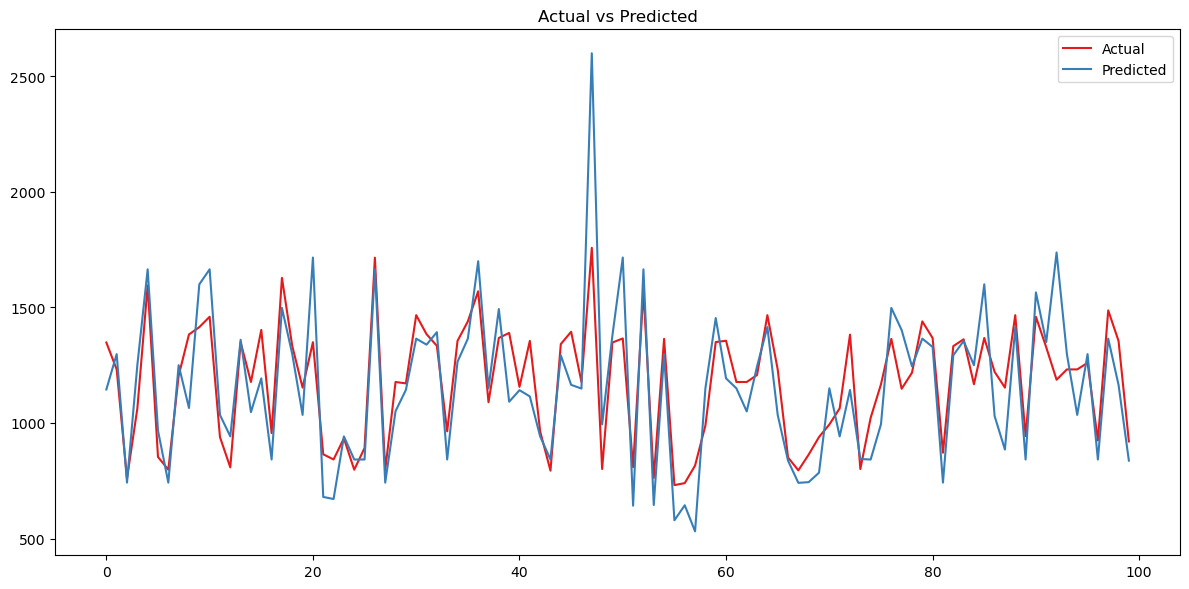

In [411]:

rf = RandomForestRegressor(n_estimators=20,max_leaf_nodes=27)
rf.fit(x_train,y_train)
y_predict_rf = rf.predict(x_test)
print('mean absolute error: ',mean_absolute_error(y_test, y_predict_rf))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict_rf)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_rf))

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_rf,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()



IMPORTANT NOTE: New parameters gave worse results. Increasing number of tree may give better results. But it will take so much time to find appropriate parameters, we will deploy it with previous parameters.

In [454]:
import pickle

We converted our model to pickle. By this way, we can use model as service on web app

In [455]:
with open('Service/predictionModel.pkl', 'wb') as file:
    pickle.dump(modelToServe, file)